Este conjunto de datos obtiene el precio de casas expresado por unidad de area. Los datos contienen la fecha de la última transacción sobre la propiedad, la edad de la casa, la distancia a la estación de metro más cercana, la cantidad de tiendas cercanas, latitud y longitud.

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt

In [2]:
realstate = pd.read_csv("real_state.csv")
realstate.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.9166667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.9166667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.5833333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.5,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.8333333,5.0,390.56840,5,24.97937,121.54245,43.1


Obteber el árbol de decisión óptimo para predecir el precio por unidad de área. Tener en cuenta que datos serán utilizados para la regresión y cuales seran descartados.

## Obtener subconjuntos

In [3]:
data = realstate.values[:,1:5]
data2 = []
# Se recorre la columna fecha de transaccion y se guarda el valor en i
for i in data[:,0]:
    # Reemplaza cada valor y lo agrega al arreglo data2
    data2.append(i.replace(",", "."))
# Guardar cada valor en la columna
data[:,0] = data2

# Otras formas
#data[:,0] = list(map(lambda b: b.replace(",","."), data[:,0]))
#data[:,0] = [item.replace(',', '.') for item in data[:,0]] 
    
data_columns = list(realstate.columns.values[1:5])
target = realstate.values[:,7]

## Crear conjuntos de entrenamiento y de prueba 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

## Entrenar modelo

In [5]:
reg = DecisionTreeRegressor(max_depth=4)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

## Calcular el error

In [6]:
error = metrics.mean_squared_error(y_test, y_pred)
print(error)

56.89971177932674


## Obtener el árbol

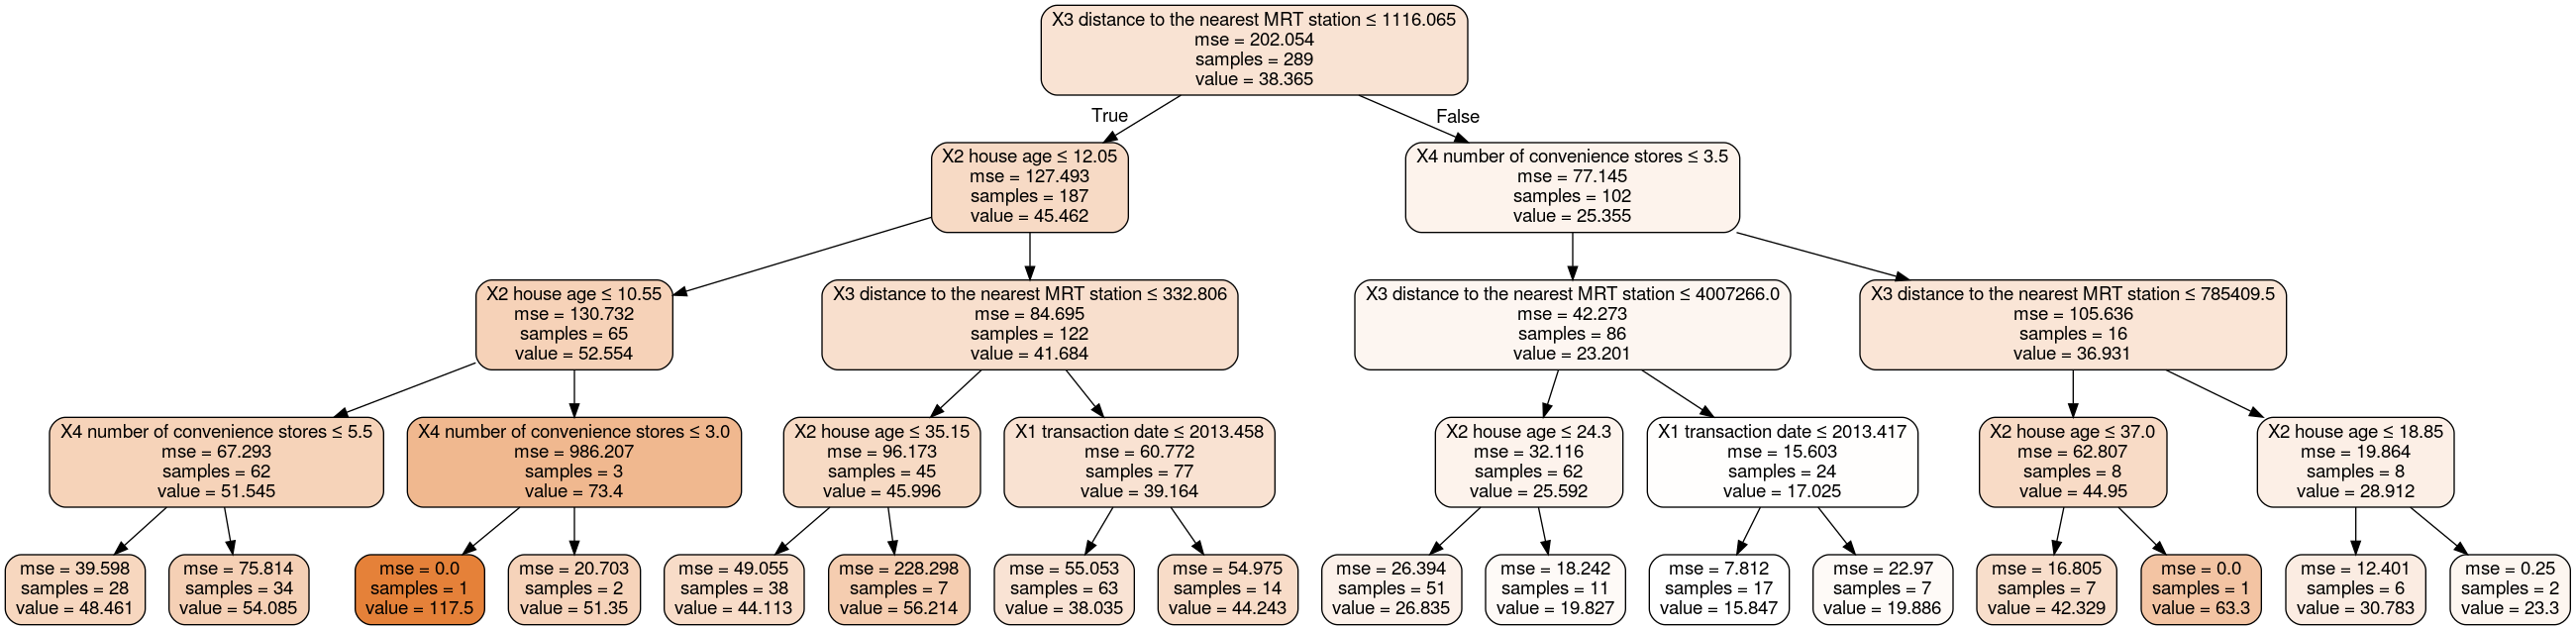

In [7]:
dot_data = StringIO()
export_graphviz(reg, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data_columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Gráfico de regresión distancia al metro y precio

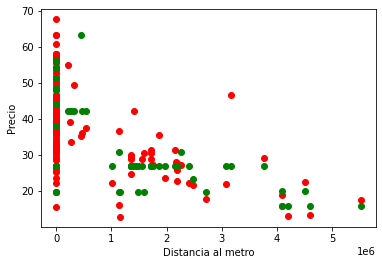

In [8]:
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.scatter(X_test[:,2], y_pred, color = 'green')
plt.xlabel('Distancia al metro')
plt.ylabel('Precio')
plt.show()

## En vez de seleccionar la fecha, seleccionamos la latitud y la longitud

In [85]:
data = realstate.values[:,2:7]
data_columns = list(realstate.columns.values[2:7])
target = realstate.values[:,7]

## Crear conjuntos de entrenamiento y de prueba 

In [86]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)


## Entrenar modelo

In [87]:
reg = DecisionTreeRegressor(max_depth=4)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


## Calcular el error

In [88]:
error = metrics.mean_squared_error(y_test, y_pred)
print(error)

48.702585109338834


## Generar el árbol

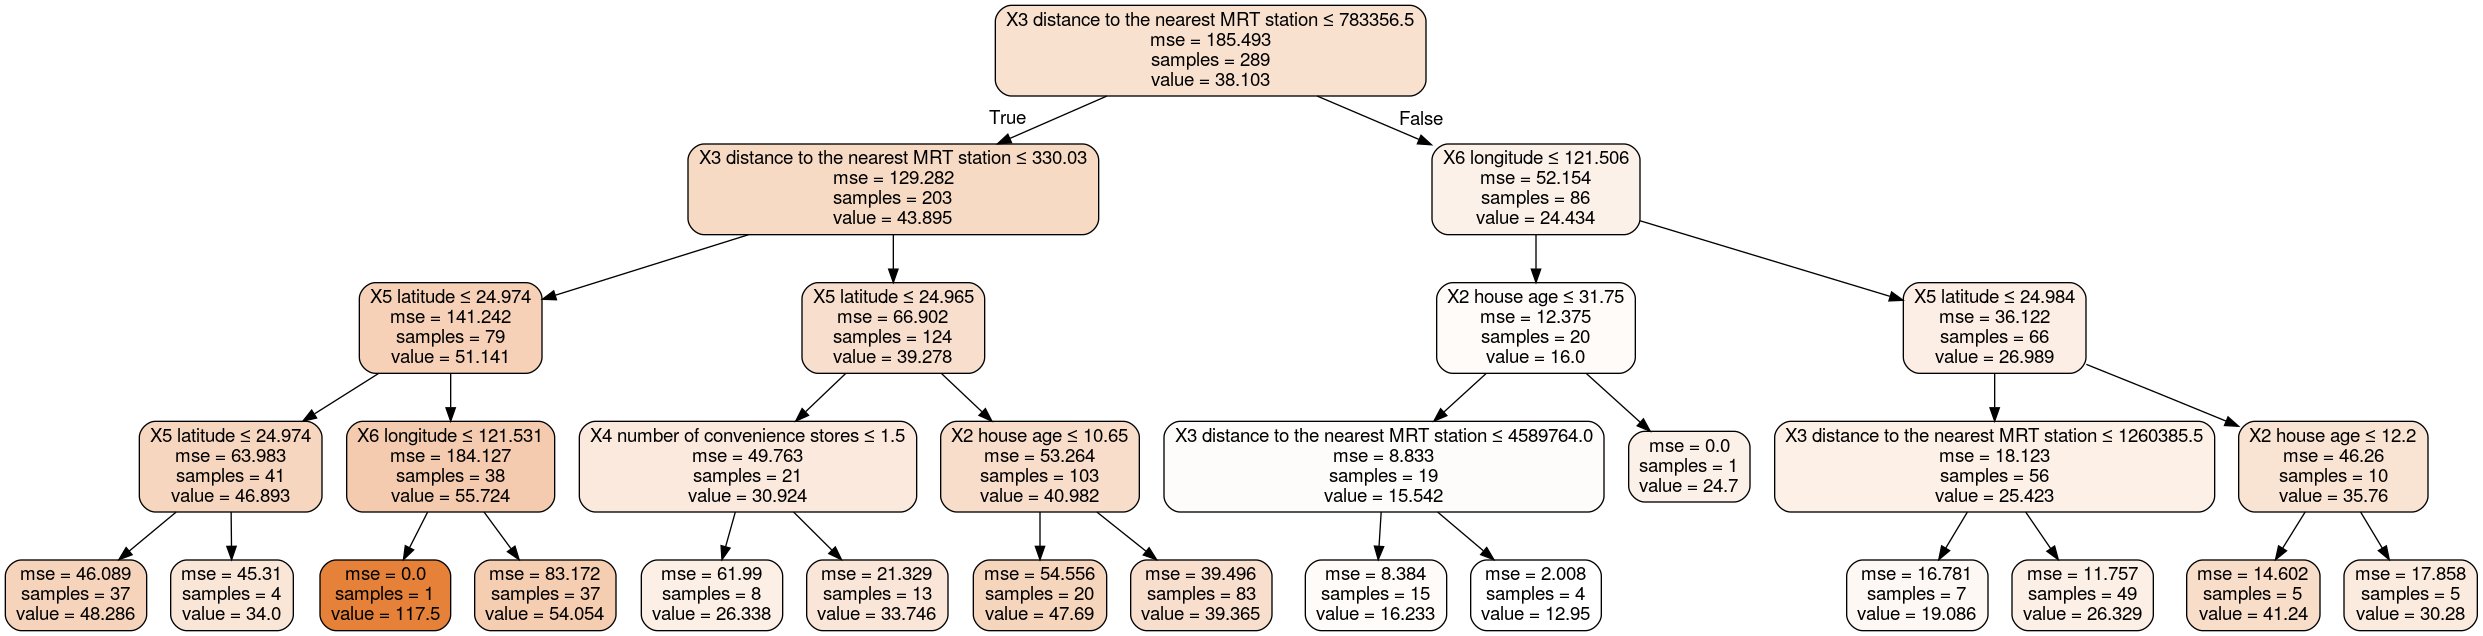

In [21]:
dot_data = StringIO()
export_graphviz(reg, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data_columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Gráfico de regresión distancia al metro y precio

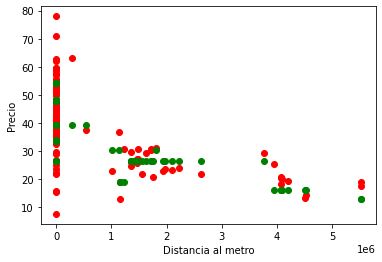

In [22]:
plt.scatter(X_test[:,1], y_test, color = 'red')
plt.scatter(X_test[:,1], y_pred, color = 'green')
plt.xlabel('Distancia al metro')
plt.ylabel('Precio')
plt.show()

## Seleccionamos todos los datos

In [38]:
data = realstate.values[:,1:7]
data2 = []
# Se recorre la columna fecha de transaccion y se guarda el valor en i
for i in data[:,0]:
    # Reemplaza cada valor y lo agrega al arreglo data2
    data2.append(i.replace(",", "."))
# Guardar cada valor en la columna
data[:,0] = data2

# Otras formas
#data[:,0] = list(map(lambda b: b.replace(",","."), data[:,0]))
#data[:,0] = [item.replace(',', '.') for item in data[:,0]] 
    
data_columns = list(realstate.columns.values[1:7])
target = realstate.values[:,7]

## Crear conjuntos de entrenamiento y de prueba 

In [81]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

## Entrenamos el modelo

In [82]:
reg = DecisionTreeRegressor(max_depth=5)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

## Calculamos el error

In [83]:
error = metrics.mean_squared_error(y_test, y_pred)
print(error)

44.534408205291484


## Generamos el árbol

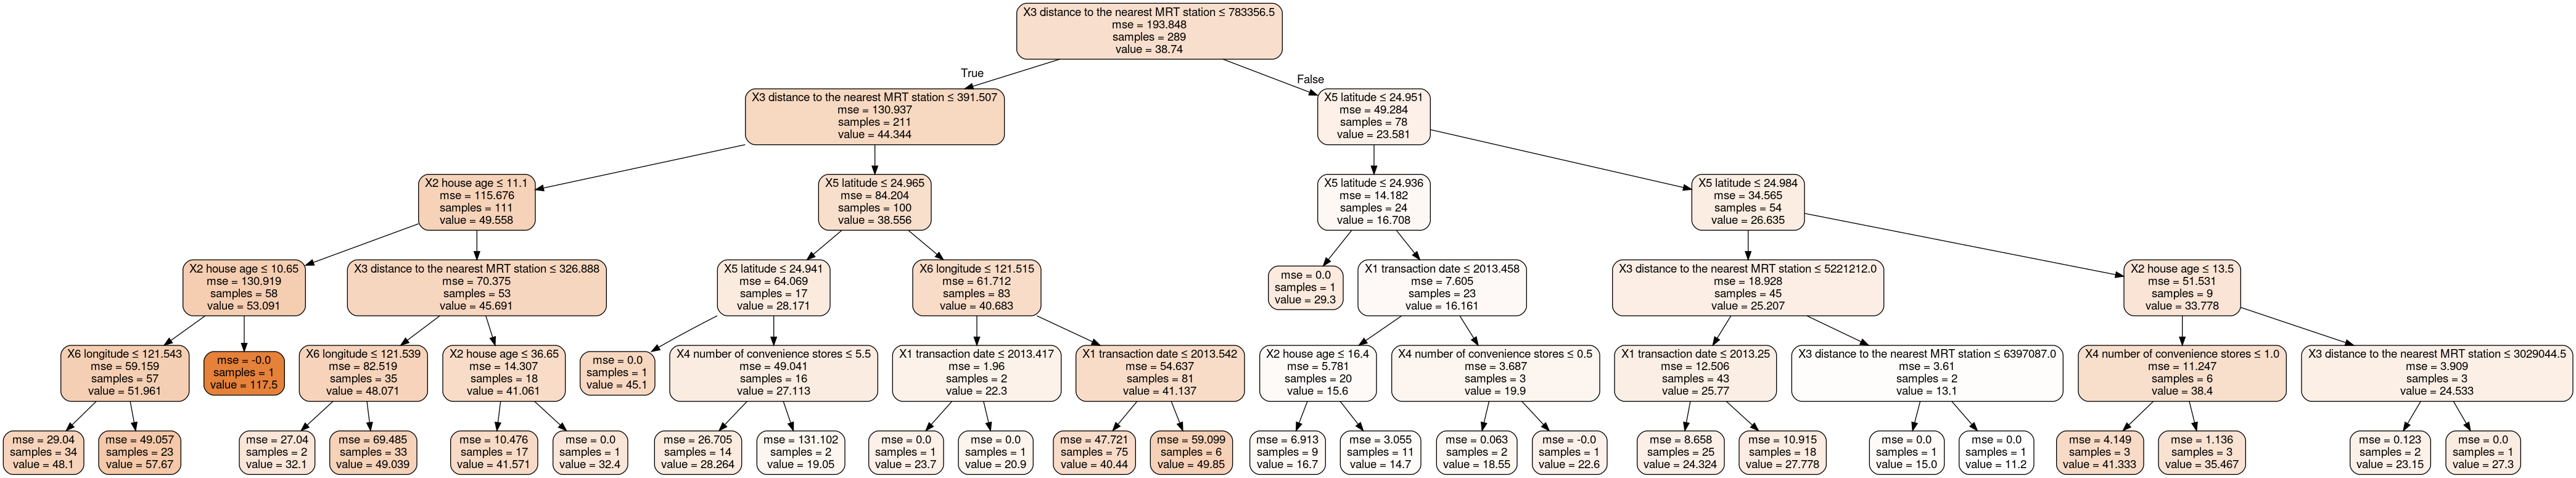

In [84]:
dot_data = StringIO()
export_graphviz(reg, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data_columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Gráfico de regresión distancia al metro y precio

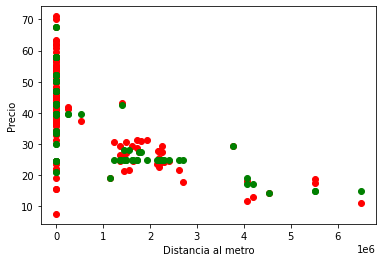

In [58]:
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.scatter(X_test[:,2], y_pred, color = 'green')
plt.xlabel('Distancia al metro')
plt.ylabel('Precio')
plt.show()

#### Conclusión: Al agregar mas variables y al trabajar de forma aleatoria, las predicciones varian mucho de una prueba a otra. Al observar los distintos árboles podemos conlcuir, que la variable mas relevante en este caso, es la distancia al metro.